In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

import numpy as np

# POMDP Toy Problem

Symmetric 3 state, 2 action model

## Model definition

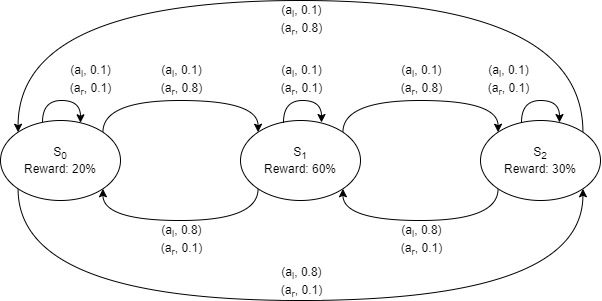

In [2]:
ACTION_COUNT = 2
STATE_COUNT = 3

In [3]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + (-1 if a == 0 else 1)) % STATE_COUNT # Left and right movement
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.1, 0.1, 0.8],
       [0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1]])

In [4]:
OBS_RND = 0.7 # 70% of observation success

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)
          
observation_table[:,0,:]

array([[0.7 , 0.15, 0.15],
       [0.15, 0.7 , 0.15],
       [0.15, 0.15, 0.7 ]])

In [5]:
REWARD_PROBS = [0.2, 0.6, 0.3]

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            reward_table[s,a,s_p] = REWARD_PROBS[s_p]
        
reward_table

array([[[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]],

       [[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]],

       [[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]]])

In [6]:
states = ['s0','s1','s2']
actions = ['left', 'right']
observations = ['s0', 's1', 's2']

model = Model(states, actions, observations, transition_table, reward_table, observation_table, probabilistic_rewards=True)

## Solving

In [7]:
solver = PBVI_Solver()

In [8]:
value_function, solve_history = solver.solve(model,8,4)

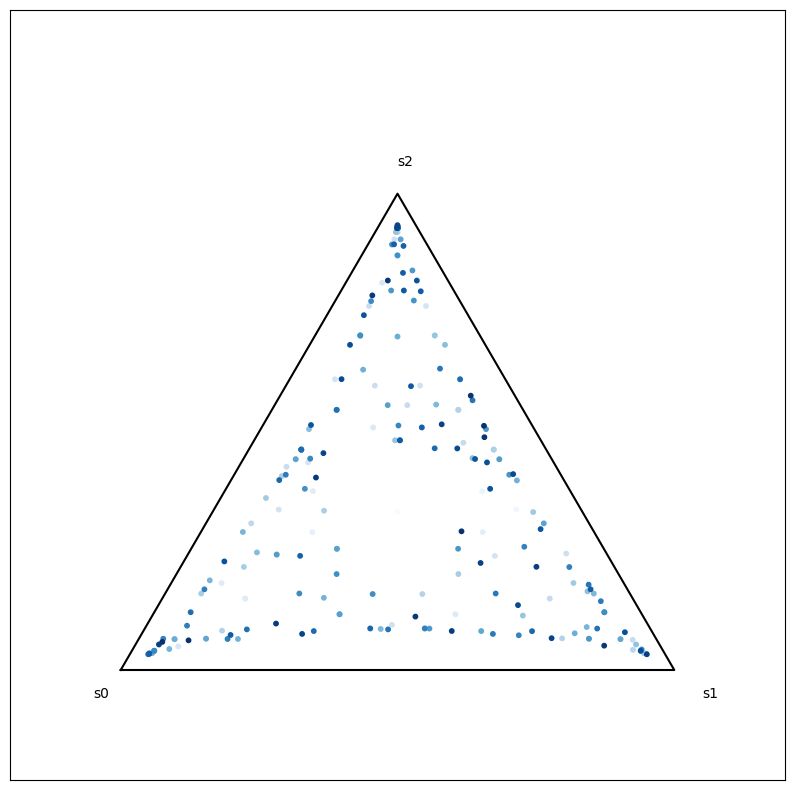

In [9]:
solve_history.plot_belief_set(10)

In [10]:
value_function

[AlphaVector([3.86555874, 3.81716019, 4.01866354]),
 AlphaVector([3.98681525, 3.88336227, 3.80231027]),
 AlphaVector([3.85736286, 3.81328058, 4.0241738 ]),
 AlphaVector([4.01864525, 3.86578612, 3.81686229]),
 AlphaVector([3.86537934, 3.81456903, 4.01958825]),
 AlphaVector([4.02422385, 3.85731883, 3.81294431]),
 AlphaVector([3.98654583, 3.88335682, 3.80251622]),
 AlphaVector([3.8630523 , 3.81776625, 4.01883342]),
 AlphaVector([3.97409959, 3.89515385, 3.72399514]),
 AlphaVector([4.02419203, 3.85734911, 3.81317352]),
 AlphaVector([3.85731883, 3.81294431, 4.02422385]),
 AlphaVector([3.98681612, 3.88336239, 3.80230782]),
 AlphaVector([3.86566591, 3.81457756, 4.01937096]),
 AlphaVector([3.86523668, 3.81717264, 4.01887496]),
 AlphaVector([4.0241738 , 3.85736286, 3.81328058]),
 AlphaVector([4.02357683, 3.85739684, 3.81549369]),
 AlphaVector([3.98542687, 3.88368853, 3.80158377]),
 AlphaVector([4.0186203 , 3.86580001, 3.81685515]),
 AlphaVector([3.85737268, 3.81550018, 4.02358044]),
 AlphaVector

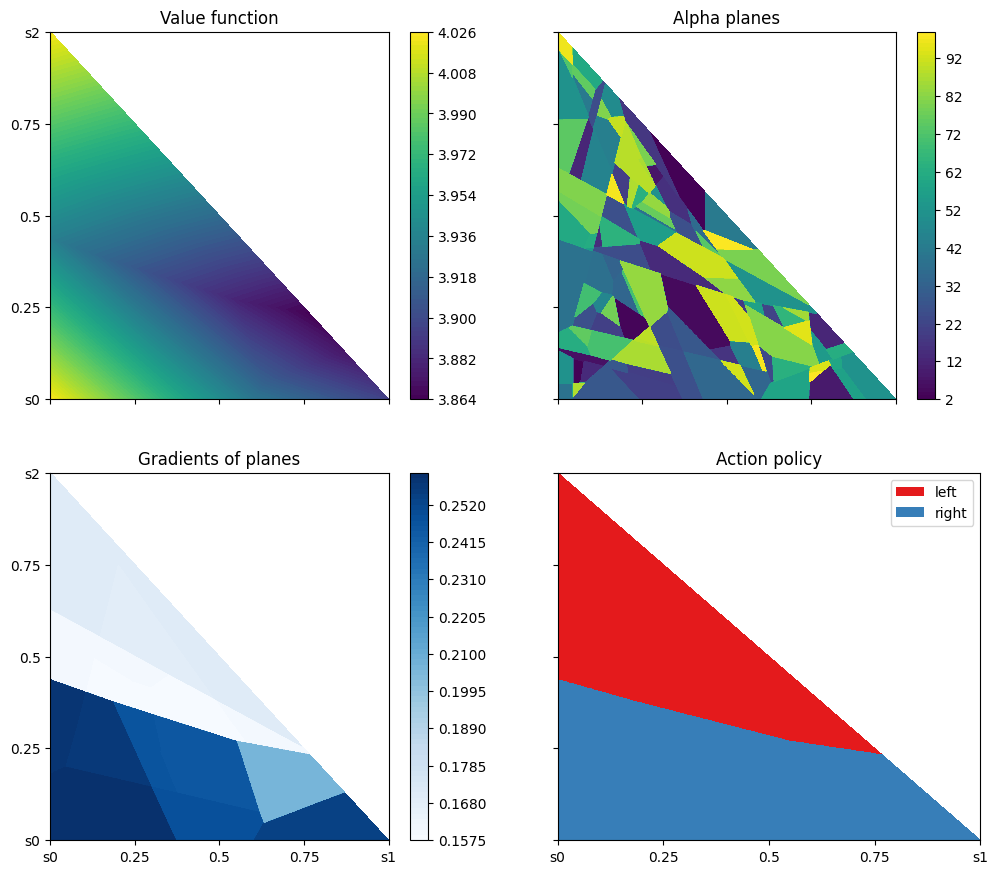

In [11]:
solve_history.plot_solution(3, plot_belief=False)

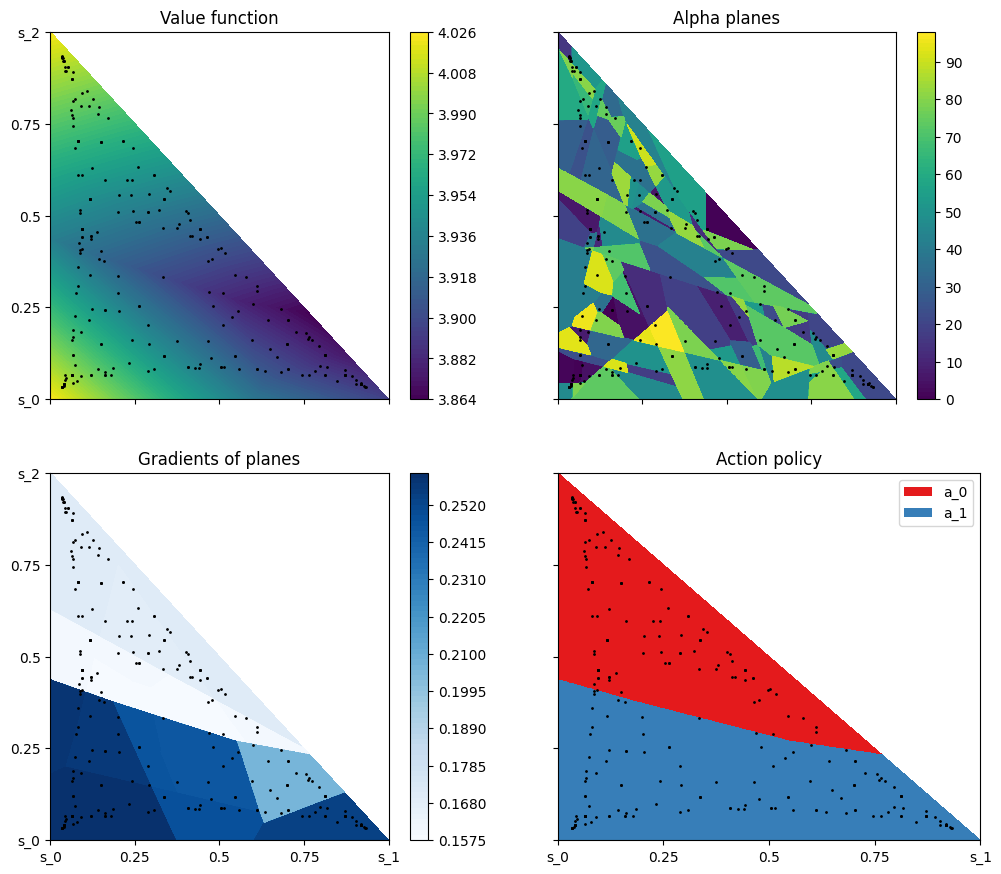

In [12]:
value_function.plot(3, belief_set=solve_history.explored_beliefs)